# Set up

1. Download and unzip AML dataset from: http://acgt.cs.tau.ac.il/multi_omic_benchmark/download.html (Rappoport & Shamir, 2019).
2. Install required packages (see set_up.R for instructions if needed)

In [1]:
library(tidyverse)
library(ggalluvial)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.




In [2]:
# Specify path to directory with downloaded data
data_dir_path = "aml"
stopifnot(file.exists(file.path(data_dir_path, 'exp')) & file.exists(file.path(data_dir_path, 'methy')) & 
          file.exists(file.path(data_dir_path, 'mirna')))

In [73]:
# Inrease plot resolution in this notebook
options(repr.plot.res=200)

# Acute Myleoid Leukemia (AML) Dataset

## (1) Closer look at the data 

In [4]:
# load gene expression data as data.frame
data_exp <- read.table(file.path(data_dir_path, 'exp'))
dim(data_exp)
head(data_exp)

[1] 20531   173

TCGA.AB.2803.03 TCGA.AB.2805.03 TCGA.AB.2806.03 TCGA.AB.2807.03
X..100130426   0.0000          0.6693          0.0000          2.0060       
X..100133144   0.0000          1.3387         14.1884          9.3247       
X..100134869   0.0000          0.0000         16.3654         13.5154       
X..10357      92.5926         92.6305        119.5990        178.4211       
X..10431     876.5432        421.6867        625.0796        537.2393       
X..136542      0.0000          0.0000          0.0000          0.0000       
             TCGA.AB.2808.03 TCGA.AB.2810.03 TCGA.AB.2811.03 TCGA.AB.2812.03
X..100130426   0.0000           0.0000          0.0000         0.0000       
X..100133144  42.3016           1.5668          0.0000        14.3289       
X..100134869  28.3975           8.9665          6.9556        11.9466       
X..10357     170.2042         152.0747         30.3103       120.3591       
X..10431     653.5742        1087.5648       1414.6602       962.5575       
X..136542      0.0000           0.0000          0.0000         0.0000       
             TCGA.AB.2813.03 TCGA.AB.2814.03 ⋯ TCGA.AB.3000.03 TCGA.AB.3001.03
X..100130426   0.0000          0.0000        ⋯   0.0000          0.9714       
X..100133144   3.4938         56.8659        ⋯   9.2970         27.4095       
X..100134869   1.3813        118.7051        ⋯   2.1808         16.4000       
X..10357      51.1883         87.1817        ⋯ 120.5308         96.7810       
X..10431     594.7593        472.6912        ⋯ 469.8709        653.3333       
X..136542      0.0000          0.0000        ⋯   0.0000          0.0000       
             TCGA.AB.3002.03 TCGA.AB.3005.03 TCGA.AB.3006.03 TCGA.AB.3007.03
X..100130426   0.0000          0.9786          1.5893           0.000       
X..100133144  15.0803          4.4524          6.2884           3.592       
X..100134869   7.1250         11.2045         15.1060          11.608       
X..10357     138.5902         96.5838         92.9054          78.104       
X..10431     575.4076        804.3761        735.0525        1123.200       
X..136542      0.0000          0.0000          0.0000           0.000       
             TCGA.AB.3008.03 TCGA.AB.3009.03 TCGA.AB.3011.03 TCGA.AB.3012.03
X..100130426   0.7002          0.0000          1.0823           0.0000      
X..100133144  25.9551         45.4430         27.1753          20.6331      
X..100134869  27.7498         55.8228         16.1147          11.9553      
X..10357     163.3719        107.1700         81.7424          86.4339      
X..10431     666.8933        511.7541        775.9740        1105.2142      
X..136542      0.0000          0.0000          0.0000           0.0000

In [5]:
# load methylation data as data.frame
data_met <- read.table(file.path(data_dir_path, 'methy'))
dim(data_exp)
head(data_exp)

[1] 20531   173

TCGA.AB.2803.03 TCGA.AB.2805.03 TCGA.AB.2806.03 TCGA.AB.2807.03
X..100130426   0.0000          0.6693          0.0000          2.0060       
X..100133144   0.0000          1.3387         14.1884          9.3247       
X..100134869   0.0000          0.0000         16.3654         13.5154       
X..10357      92.5926         92.6305        119.5990        178.4211       
X..10431     876.5432        421.6867        625.0796        537.2393       
X..136542      0.0000          0.0000          0.0000          0.0000       
             TCGA.AB.2808.03 TCGA.AB.2810.03 TCGA.AB.2811.03 TCGA.AB.2812.03
X..100130426   0.0000           0.0000          0.0000         0.0000       
X..100133144  42.3016           1.5668          0.0000        14.3289       
X..100134869  28.3975           8.9665          6.9556        11.9466       
X..10357     170.2042         152.0747         30.3103       120.3591       
X..10431     653.5742        1087.5648       1414.6602       962.5575       
X..136542      0.0000           0.0000          0.0000         0.0000       
             TCGA.AB.2813.03 TCGA.AB.2814.03 ⋯ TCGA.AB.3000.03 TCGA.AB.3001.03
X..100130426   0.0000          0.0000        ⋯   0.0000          0.9714       
X..100133144   3.4938         56.8659        ⋯   9.2970         27.4095       
X..100134869   1.3813        118.7051        ⋯   2.1808         16.4000       
X..10357      51.1883         87.1817        ⋯ 120.5308         96.7810       
X..10431     594.7593        472.6912        ⋯ 469.8709        653.3333       
X..136542      0.0000          0.0000        ⋯   0.0000          0.0000       
             TCGA.AB.3002.03 TCGA.AB.3005.03 TCGA.AB.3006.03 TCGA.AB.3007.03
X..100130426   0.0000          0.9786          1.5893           0.000       
X..100133144  15.0803          4.4524          6.2884           3.592       
X..100134869   7.1250         11.2045         15.1060          11.608       
X..10357     138.5902         96.5838         92.9054          78.104       
X..10431     575.4076        804.3761        735.0525        1123.200       
X..136542      0.0000          0.0000          0.0000           0.000       
             TCGA.AB.3008.03 TCGA.AB.3009.03 TCGA.AB.3011.03 TCGA.AB.3012.03
X..100130426   0.7002          0.0000          1.0823           0.0000      
X..100133144  25.9551         45.4430         27.1753          20.6331      
X..100134869  27.7498         55.8228         16.1147          11.9553      
X..10357     163.3719        107.1700         81.7424          86.4339      
X..10431     666.8933        511.7541        775.9740        1105.2142      
X..136542      0.0000          0.0000          0.0000           0.0000

In [6]:
# load microRNA expression data as data.frame
data_mirna <- read.table(file.path(data_dir_path, 'mirna'))
dim(data_mirna)
head(data_mirna)

[1] 705 188

TCGA.AB.2802.03 TCGA.AB.2803.03 TCGA.AB.2805.03 TCGA.AB.2806.03
hsa.let.7a.1  9239.4684      10699.2478       6724.51891      7187.20407    
hsa.let.7a.2 17917.0312      21746.6409      13272.04857     14017.49452    
hsa.let.7a.3  9302.0535      10589.1203       6754.55345      7201.59575    
hsa.let.7b   40096.6532       8930.9900      13710.76738     11042.73465    
hsa.let.7c     474.8306        123.4494         58.99642        50.37087    
hsa.let.7d    2239.4588       1229.1657       3983.86716      5414.14932    
             TCGA.AB.2807.03 TCGA.AB.2808.03 TCGA.AB.2810.03 TCGA.AB.2811.03
hsa.let.7a.1  9611.669        6006.6527       7083.66925      5902.5650     
hsa.let.7a.2 19177.618       11770.7888      13945.76528     11637.4033     
hsa.let.7a.3  9686.887        6086.1982       7122.37783      5958.2126     
hsa.let.7b   21223.250        8253.3271      42861.07092     10616.1522     
hsa.let.7c    9070.395         883.7307         77.41715       354.2636     
hsa.let.7d    3370.057        4002.4950       2008.84157      2841.1629     
             TCGA.AB.2812.03 TCGA.AB.2813.03 ⋯ TCGA.AB.3000.03 TCGA.AB.3001.03
hsa.let.7a.1 12440.9204       7335.9751      ⋯  7634.217       10407.5812     
hsa.let.7a.2 23958.6269      14408.1336      ⋯ 15514.186       21007.8314     
hsa.let.7a.3 12338.7950       7297.1391      ⋯  7514.232       10166.4567     
hsa.let.7b   40096.4881      18263.6050      ⋯ 16221.084        9235.4160     
hsa.let.7c     976.3192        412.4645      ⋯  1859.042         114.2169     
hsa.let.7d    2730.8341       3659.9525      ⋯  3676.162        3352.6694     
             TCGA.AB.3002.03 TCGA.AB.3005.03 TCGA.AB.3006.03 TCGA.AB.3007.03
hsa.let.7a.1 10369.858        9174.2466      10062.156       10489.25428    
hsa.let.7a.2 20340.109       18355.6106      19494.100       21722.07801    
hsa.let.7a.3 10360.671        9622.6388      10013.176       10367.92873    
hsa.let.7b   22990.371       36675.6345      31059.947       11762.57191    
hsa.let.7c    6291.118         124.5534       1425.322          62.46464    
hsa.let.7d    5171.915        1476.8473       3590.245        5058.43447    
             TCGA.AB.3008.03 TCGA.AB.3009.03 TCGA.AB.3011.03 TCGA.AB.3012.03
hsa.let.7a.1  6531.555        8496.8364       9195.26606     10358.9170     
hsa.let.7a.2 12619.686       16527.8342      18288.52442     21535.9967     
hsa.let.7a.3  6388.414        8409.7637       9414.82551     10444.3967     
hsa.let.7b   11399.881       12689.3829      36715.97363      9865.5771     
hsa.let.7c    2175.110          98.6823         76.74865       206.3724     
hsa.let.7d    3301.562        3947.2920       2776.55261      3490.0135

**Warm up exercise**:
1. How many samples and features are in each data matrix?
2. What type of biological samples are in this dataset? (Hint: look up the TCGA barcodes)
3. What do values in each data matrix represent?

In [24]:
tibble(sample = c(colnames(data_exp), colnames(data_met), colnames(data_mirna))) %>%
    distinct() %>%
    separate(sample, c('tcga', 'tss', 'participant', 'st'), sep="\\.") %>%
    group_by(st) %>%
    summarise(nsample=n())

st nsample
1 03 197

## (2) TCGA Subtypes

How many uniques samples are in our dataset? 

In [7]:
tibble(sample = colnames(data_exp), layer="exp") %>%
    full_join(tibble(sample = colnames(data_met), layer="met"), by = c("sample", "layer")) %>%
    full_join(tibble(sample = colnames(data_mirna), layer="mirna"), by = c("sample", "layer")) %>%
    spread(layer,layer) %>%
    mutate(layers=paste(exp, met, mirna, sep=",")) %>%
    group_by(layers) %>%
    summarise(nsample=n())

layers        nsample
1 exp,met,mirna 170    
2 exp,NA,mirna    3    
3 NA,met,mirna   15    
4 NA,met,NA       9

Inspect the file with **known TCGA subtypes** (*AML_subtypes.tsv* in the *TCGA_subtypes* directory): 
1. How many samples do not have subtype information available?
2. How many different classifications/subtypes are there?
3. "Subtype_Selected" denotes the most commonly used classification. Which data type this classification is based on? 

In [23]:
subtypes <- read_tsv("TCGA_subtypes/AML_subtypes.tsv", show_col_types = FALSE)
dim(subtypes)
head(subtypes)

[1] 197   5

sample_codes    samples      Subtype_miRNA Subtype_mRNA Subtype_Selected
1 TCGA.AB.2803.03 TCGA-AB-2803 5             3            AML.3           
2 TCGA.AB.2805.03 TCGA-AB-2805 1             5            AML.5           
3 TCGA.AB.2806.03 TCGA-AB-2806 4             4            AML.4           
4 TCGA.AB.2807.03 TCGA-AB-2807 4             6            AML.6           
5 TCGA.AB.2808.03 TCGA-AB-2808 4             5            AML.5           
6 TCGA.AB.2810.03 TCGA-AB-2810 3             1            AML.1

In [9]:
subtypes %>%
    gather(classification, subtype, -sample_codes, -samples) %>%
    group_by(classification, subtype) %>%
    summarise(n=n())

`summarise()` has grouped output by 'classification'. You can override using the `.groups` argument.



classification   subtype n 
1  Subtype_miRNA    1       14
2  Subtype_miRNA    2       40
3  Subtype_miRNA    3       50
4  Subtype_miRNA    4       65
5  Subtype_miRNA    5       18
6  Subtype_miRNA    NA      10
7  Subtype_mRNA     1       14
8  Subtype_mRNA     2       21
9  Subtype_mRNA     3       18
10 Subtype_mRNA     4       37
11 Subtype_mRNA     5       33
12 Subtype_mRNA     6       35
13 Subtype_mRNA     7       20
14 Subtype_mRNA     NA      19
15 Subtype_Selected AML.1   14
16 Subtype_Selected AML.2   21
17 Subtype_Selected AML.3   18
18 Subtype_Selected AML.4   37
19 Subtype_Selected AML.5   33
20 Subtype_Selected AML.6   35
21 Subtype_Selected AML.7   20
22 Subtype_Selected NA      19

In [10]:
subtypes %>%
    select(matches("Subtype_*")) %>%
    is.na() %>% 
    as_tibble() %>%
    mutate(no_classifications_with_missing_label = rowSums(.)) %>%
    filter(no_classifications_with_missing_label != 0) %>%
    arrange(desc(no_classifications_with_missing_label)) 

Subtype_miRNA Subtype_mRNA Subtype_Selected
1   TRUE         TRUE         TRUE            
2   TRUE         TRUE         TRUE            
3   TRUE         TRUE         TRUE            
4   TRUE         TRUE         TRUE            
5   TRUE         TRUE         TRUE            
6   TRUE         TRUE         TRUE            
7   TRUE         TRUE         TRUE            
8   TRUE         TRUE         TRUE            
9   TRUE         TRUE         TRUE            
10  TRUE         TRUE         TRUE            
11 FALSE         TRUE         TRUE            
12 FALSE         TRUE         TRUE            
13 FALSE         TRUE         TRUE            
14 FALSE         TRUE         TRUE            
15 FALSE         TRUE         TRUE            
16 FALSE         TRUE         TRUE            
17 FALSE         TRUE         TRUE            
18 FALSE         TRUE         TRUE            
19 FALSE         TRUE         TRUE            
   no_classifications_with_missing_label
1  3                                    
2  3                                    
3  3                                    
4  3                                    
5  3                                    
6  3                                    
7  3                                    
8  3                                    
9  3                                    
10 3                                    
11 2                                    
12 2                                    
13 2                                    
14 2                                    
15 2                                    
16 2                                    
17 2                                    
18 2                                    
19 2

`summarise()` has grouped output by 'Subtype_miRNA', 'Subtype_mRNA'. You can override using the `.groups` argument.

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


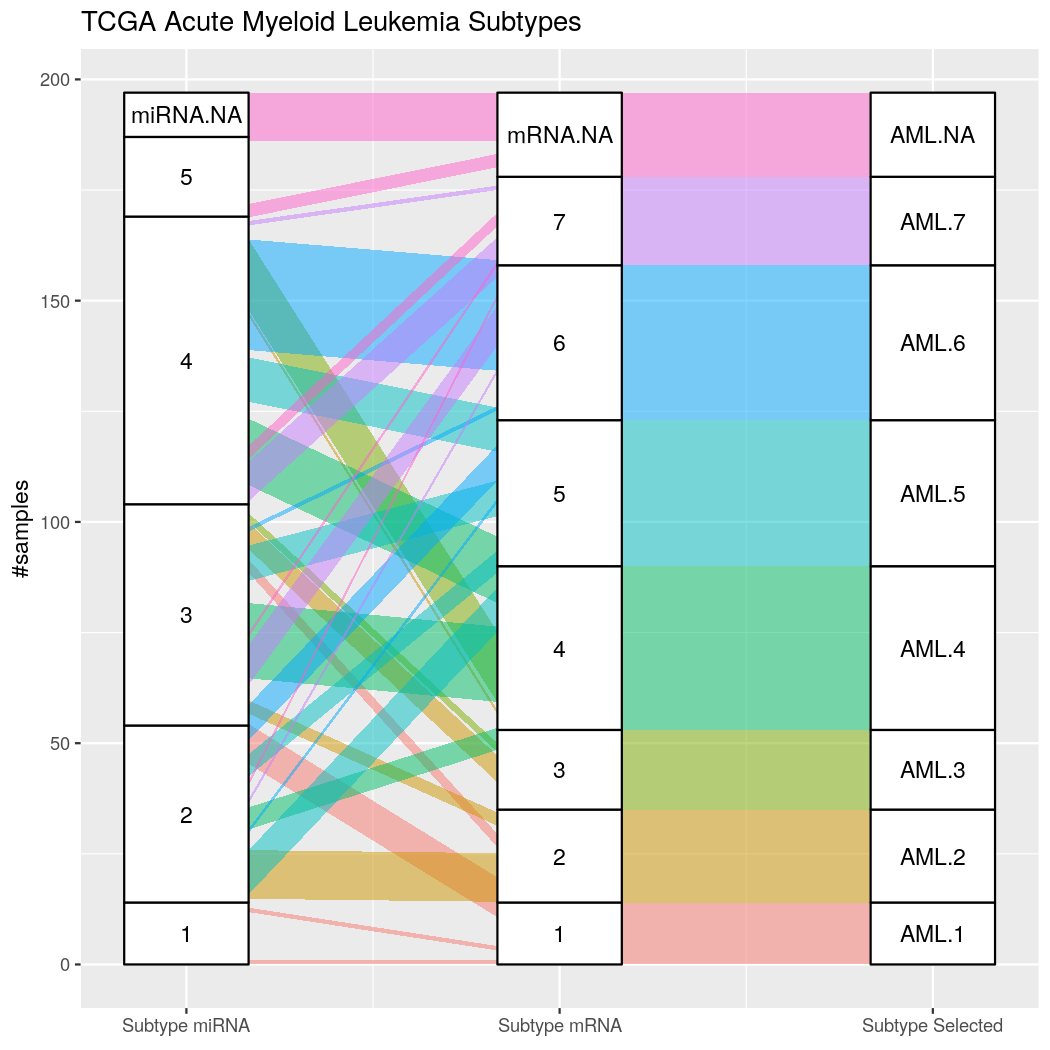

In [11]:
subtypes %>% 
    mutate(Subtype_miRNA=ifelse(is.na(Subtype_miRNA), 'miRNA.NA', Subtype_miRNA), # distinct groups for plotting 
           Subtype_mRNA=ifelse(is.na(Subtype_mRNA), 'mRNA.NA', Subtype_mRNA),
           Subtype_Selected=ifelse(is.na(Subtype_Selected), 'AML.NA', Subtype_Selected)) %>%
    group_by(Subtype_miRNA, Subtype_mRNA, Subtype_Selected) %>%
    summarise(nsamples=n()) %>%
    ggplot(aes(y=nsamples, axis1=Subtype_miRNA, axis2=Subtype_mRNA, 
                      axis3=Subtype_Selected)) +
      geom_alluvium(aes(fill=Subtype_Selected), width = 0, knot.pos = 0, reverse = FALSE) +
      guides(fill = FALSE) +
      geom_stratum(width = 1/3, reverse = FALSE) +
      geom_text(stat = "stratum", aes(label = after_stat(stratum)),
                reverse = FALSE) +
      scale_x_continuous(breaks = 1:3, labels = c("Subtype miRNA", "Subtype mRNA", "Subtype Selected")) +
      labs(title="TCGA Acute Myeloid Leukemia Subtypes", y="#samples")


- Most commonly used classification for TCGA-AML samples is based purely on gene expression data.
- Subtypes found based on miRNA and mRNA expression are videly different.
- There is no integrative classification available.

Can we "improve the classification" of samples by integrating both miRNA and mRNA expression data, as well as methylation data? 

## (3) Examine separate datatypes

In [48]:
# set color palettes we are going to use for subtype visualization
exp_subtypes_col = setNames(RColorBrewer::brewer.pal(name = "Set2", n = 7),
                            unique(na.omit(subtypes$Subtype_Selected)))
miRNA_subtypes_col = setNames(RColorBrewer::brewer.pal(name = "Set2", n = 5),
                            unique(na.omit(subtypes$Subtype_miRNA)))

### I. Gene expression

In [12]:
exp_subtypes <- tibble(sample_codes=colnames(data_exp)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_exp'

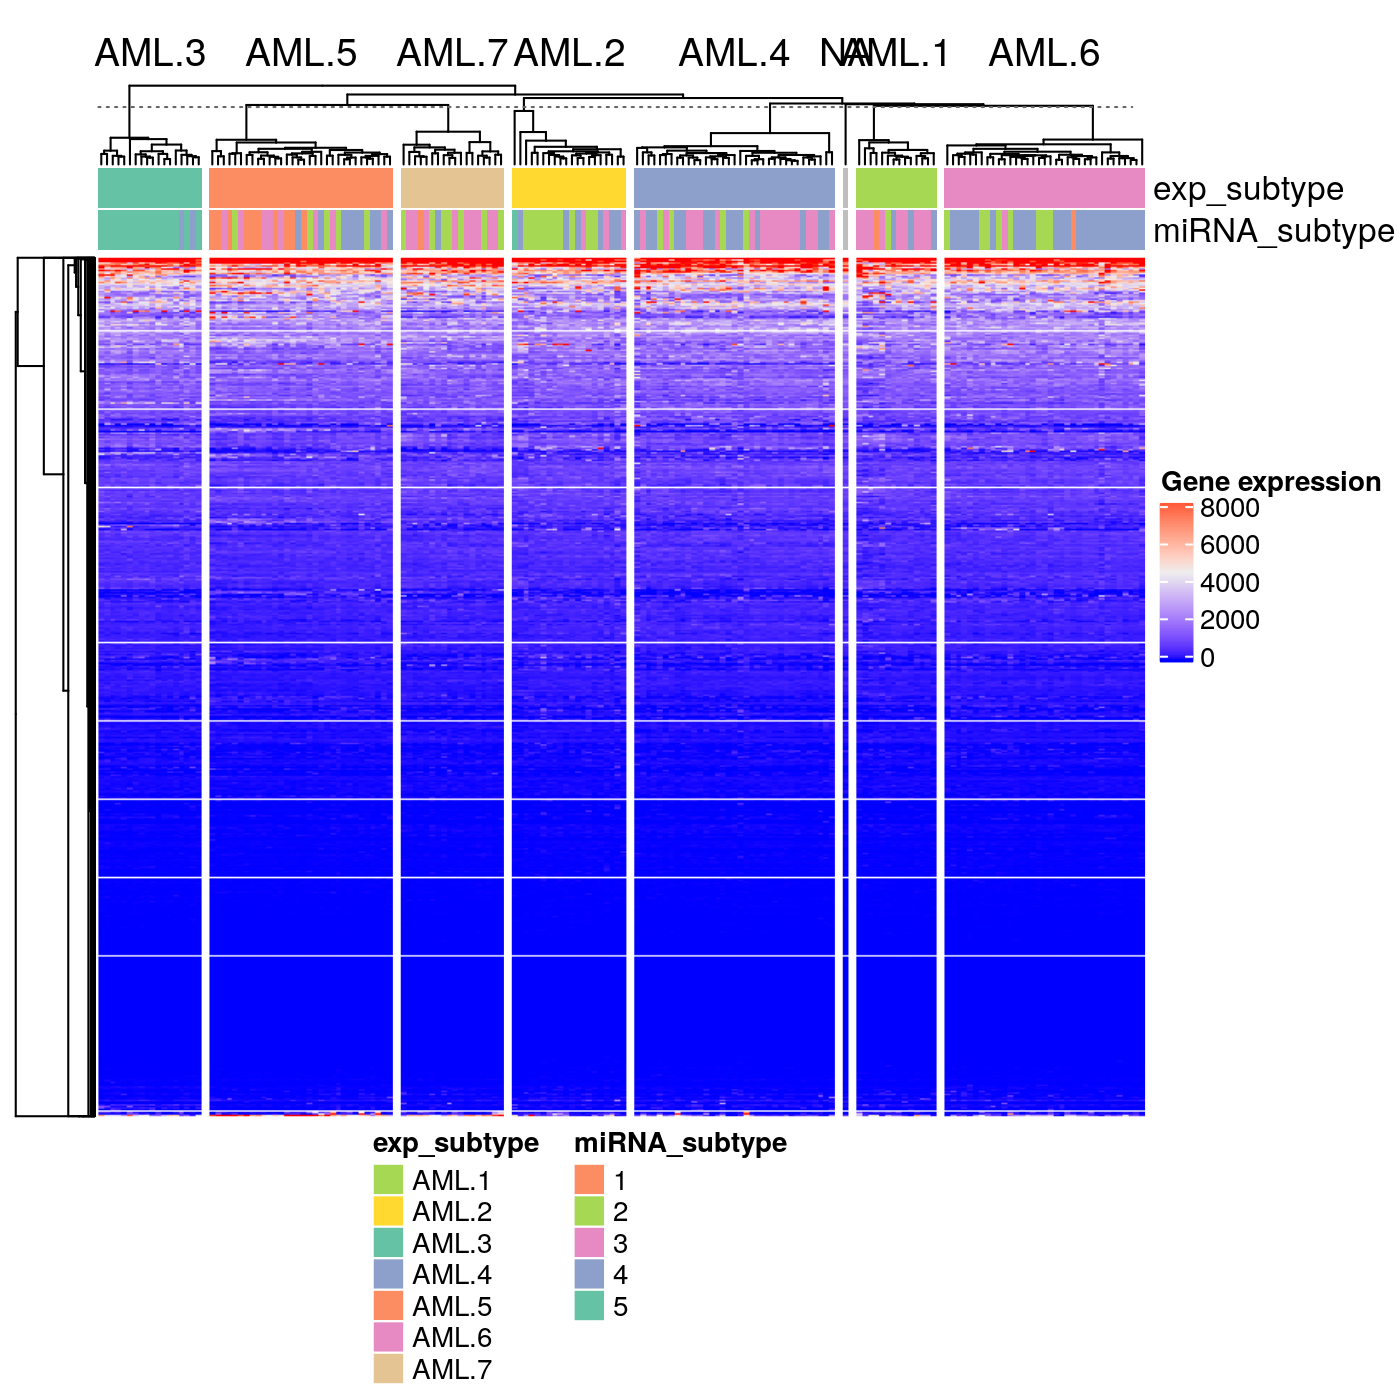

In [76]:
h <- Heatmap(as.matrix(data_exp), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(exp_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(exp_subtypes$Subtype_miRNA),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     miRNA_subtype=miRNA_subtypes_col)),
        column_split=as.factor(exp_subtypes$Subtype_Selected),
        name= "Gene expression")

draw(h, annotation_legend_side="bottom")
#this step can take a couple of minutes

Even though the subtypes were created using mRNA expression information, it is hard to notice any difference between samples. This is partially because we are looking at **raw read counts**. Some gene counts greatly dominate the data, which makes it hard to observe the expression patterns/trends. Because of this, for downstream analysis (such as visualization or clustering) it may be useful to work with transformed version of count data. Here we apply the most frequently used logarithmic transformation i.e.: y = log2(x+n), where x represent count values, and n an added positive constant (since count values for gene can be zero). The transformation also has an additional advantage of reducing the effect of outliers in the data.

See [this](http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#count-data-transformations) manual for more examples and discussion of count data transformation.

Additionally, we also apply a simple filter to remove non-informative features, defined as features with constant value in our set of samples.

In [49]:
preprocess.matrix <- function(data.matrix) {
  num = log2(data.matrix + 1)
  should.keep = (apply(num, 1, function(x) sd(x, na.rm=TRUE)) != 0) # we remove non-informative features 
  return(num[should.keep,])
}
dim(data_exp)                       
data_exp_tr <- preprocess.matrix(data_exp)
dim(data_exp_tr)

[1] 20531   173

[1] 19940   173

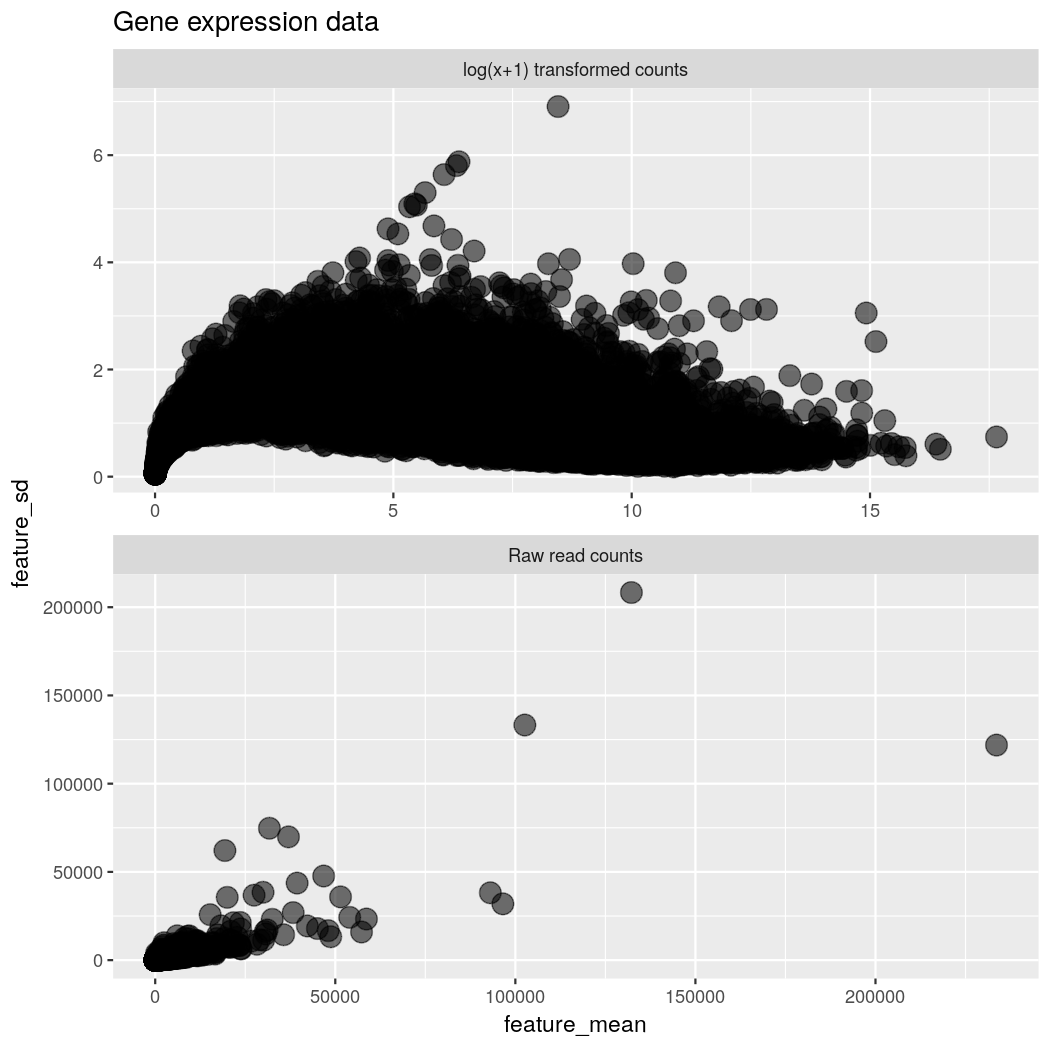

In [50]:
tibble(feature_mean=c(rowMeans(data_exp, na.rm = TRUE), 
                      rowMeans(data_exp_tr, na.rm = TRUE)), 
       feature_sd=c(apply(data_exp, 1, function(x) sd(x, na.rm=TRUE)), 
                          apply(data_exp_tr, 1, function(x) sd(x, na.rm=TRUE))),
        data_matrix=c(rep("Raw read counts", dim(data_exp)[1]), 
                      rep("log(x+1) transformed counts", dim(data_exp_tr)[1]))) %>%
    mutate(data_matrix=as.factor(data_matrix)) %>%
    ggplot() + 
        geom_point(aes(x=feature_mean, y=feature_sd, size=1, alpha=0.1)) + 
        facet_wrap(data_matrix~., scales="free", ncol=1) + 
        guides(size=FALSE, alpha=FALSE) +
        ggtitle("Gene expression data")

In [54]:
# Save transformed gene expression data (we are going to use it later)
write.table(data_exp_tr, file = file.path(data_dir_path, "exp_tr"), 
            row.names = TRUE, col.names = TRUE)

To further improve our visualization we apply additional z-score standardization to make the value of each feature in the data be zero-mean and unit variance. Z-score is calculated by subtracting the average gene abundance for each gene, and dividing that result by the standard deviation of all of the measured counts across all samples.

In [55]:
normalize.matrix <- function(data.matrix) {
  num = data.matrix - rowMeans(data.matrix, na.rm=TRUE)
  return((num / apply(num, 1, function(x) sd(x, na.rm=TRUE))))
}
data_exp_norm <- normalize.matrix(data_exp_tr)                   

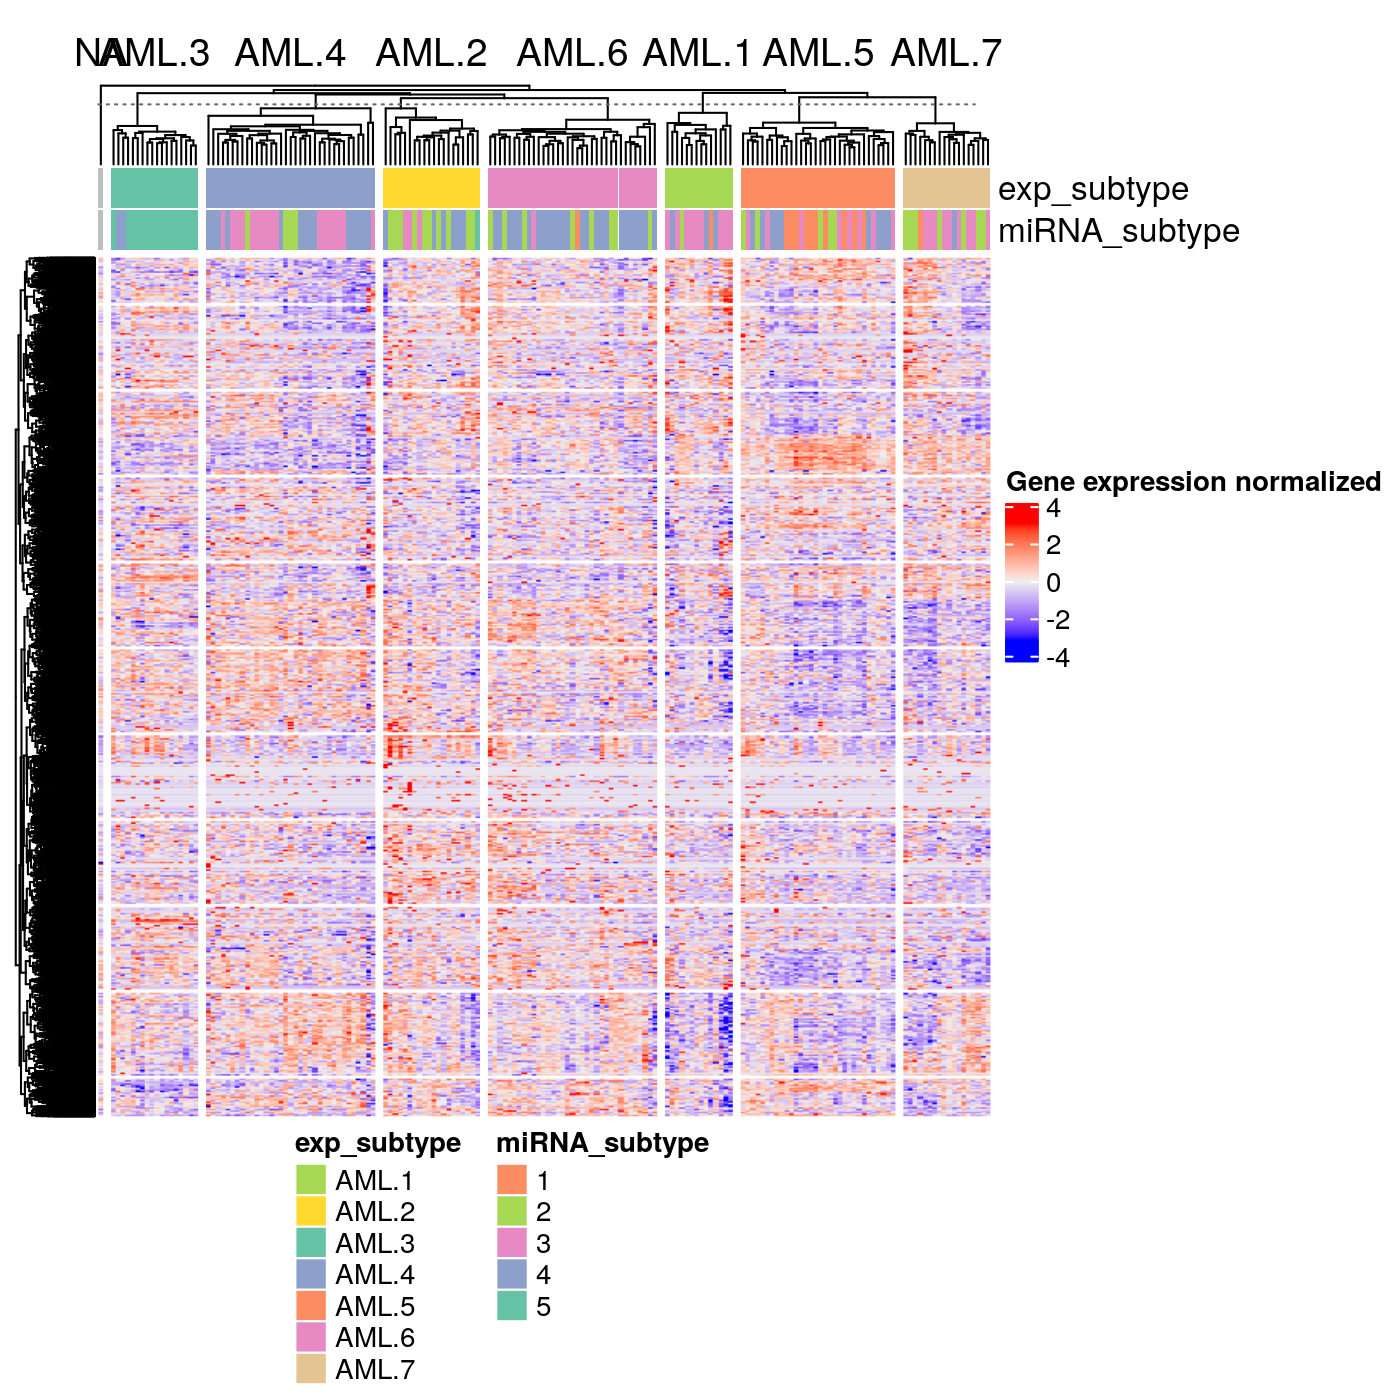

In [77]:
h <- Heatmap(as.matrix(data_exp_norm), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(exp_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(exp_subtypes$Subtype_miRNA),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     miRNA_subtype=miRNA_subtypes_col)),
        column_split=as.factor(exp_subtypes$Subtype_Selected),
        name= "Gene expression normalized")

draw(h, annotation_legend_side="bottom")
#this step can take a couple of minutes

### II. microRNA expression

In [79]:
mirna_subtypes <- tibble(sample_codes=colnames(data_mirna)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_mirna'

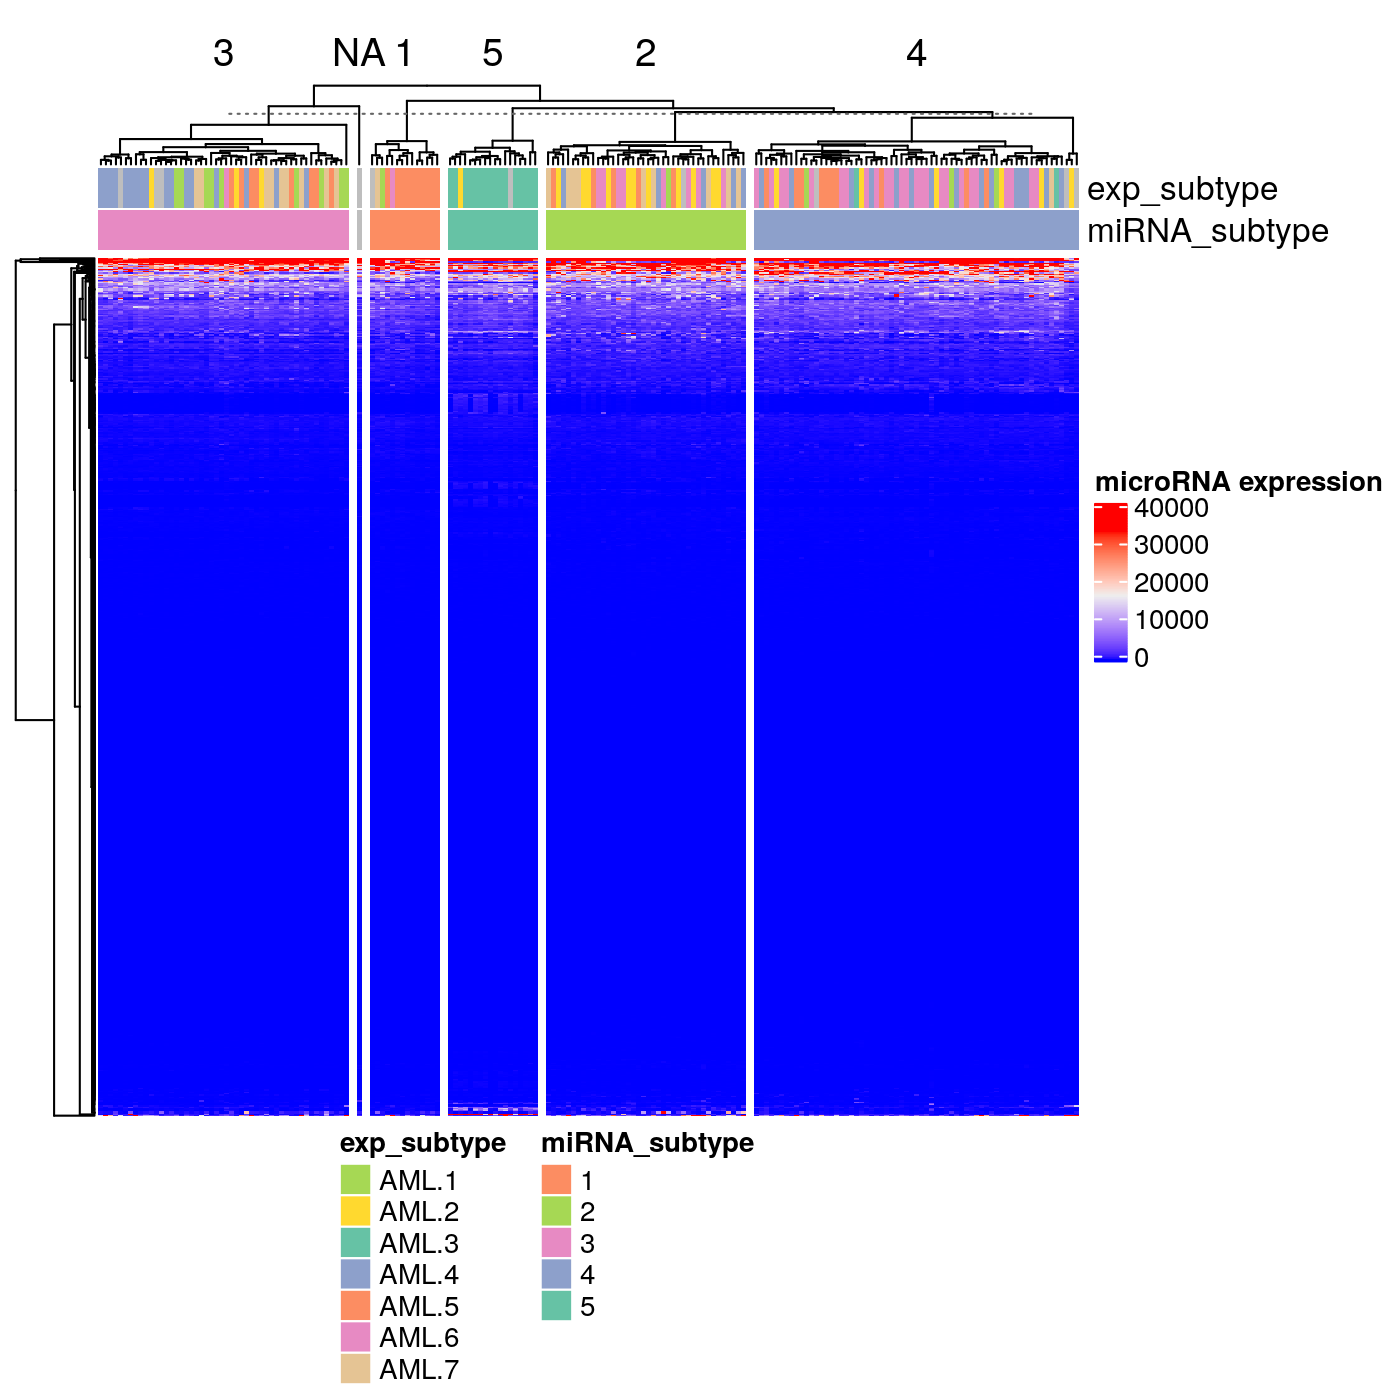

In [80]:
h <- Heatmap(as.matrix(data_mirna), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(mirna_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(mirna_subtypes$Subtype_miRNA),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     miRNA_subtype=miRNA_subtypes_col)),
        column_split=as.factor(mirna_subtypes$Subtype_miRNA),
        name= "microRNA expression")

draw(h, annotation_legend_side="bottom")

As with gene expression, we apply the log(x+1) transformation to raw counts.

In [61]:
dim(data_mirna)                       
data_mirna_tr <- preprocess.matrix(data_mirna)
dim(data_mirna_tr)

[1] 705 188

[1] 561 188

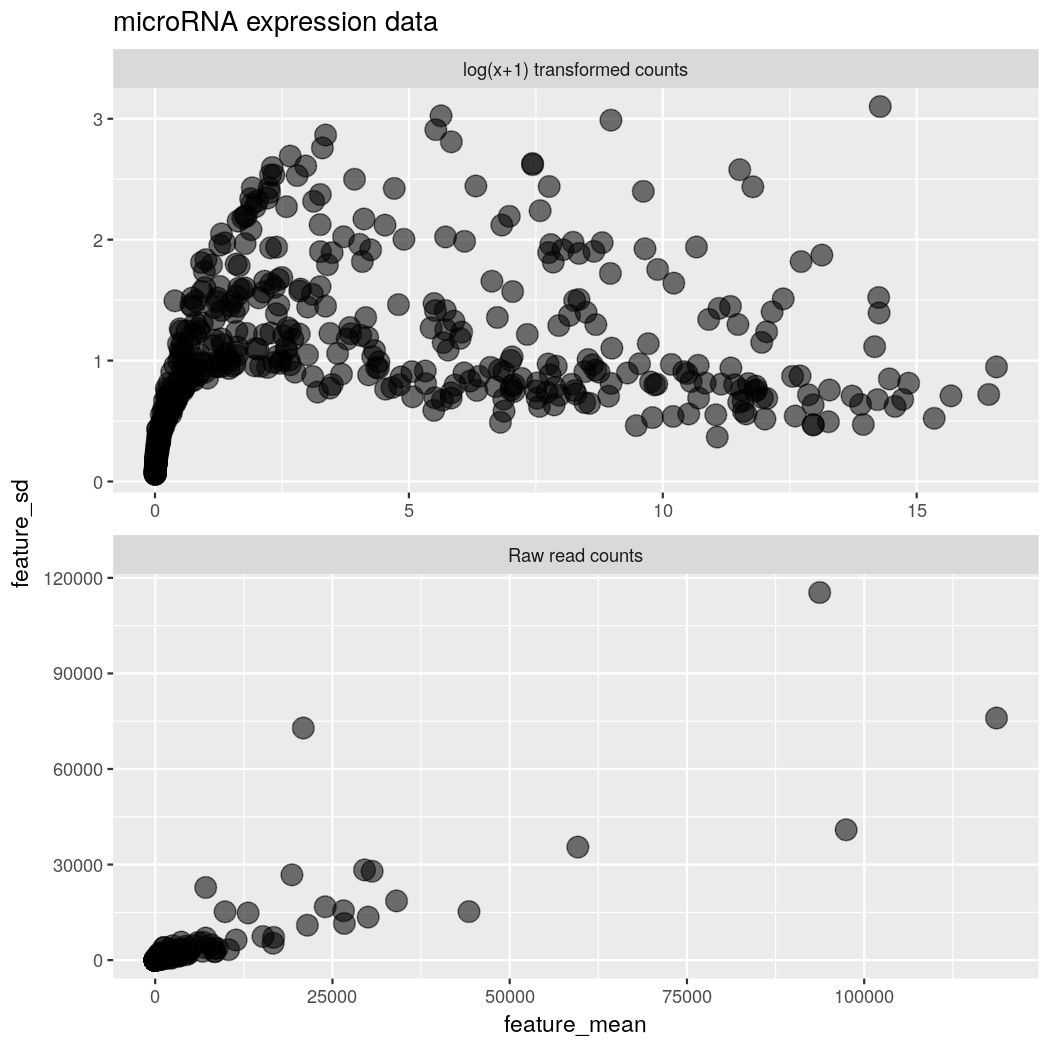

In [62]:
tibble(feature_mean=c(rowMeans(data_mirna, na.rm = TRUE), 
                      rowMeans(data_mirna_tr, na.rm = TRUE)), 
       feature_sd=c(apply(data_mirna, 1, function(x) sd(x, na.rm=TRUE)), 
                          apply(data_mirna_tr, 1, function(x) sd(x, na.rm=TRUE))),
        data_matrix=c(rep("Raw read counts", dim(data_mirna)[1]), 
                      rep("log(x+1) transformed counts", dim(data_mirna_tr)[1]))) %>%
    mutate(data_matrix=as.factor(data_matrix)) %>%
    ggplot() + 
        geom_point(aes(x=feature_mean, y=feature_sd, size=1, alpha=0.1)) + 
        facet_wrap(data_matrix~., scales="free", ncol=1) + 
        guides(size=FALSE, alpha=FALSE) +
        ggtitle("microRNA expression data")

In [63]:
#Save transformed microRNA expression data (we are going to use it later)
write.table(data_mirna_tr, file = file.path(data_dir_path, "mirna_tr"), 
            row.names = TRUE, col.names = TRUE)

Again, let's apply the z-score normailzation to improve our visualization.

In [64]:
data_mirna_norm <- normalize.matrix(data_mirna_tr)   

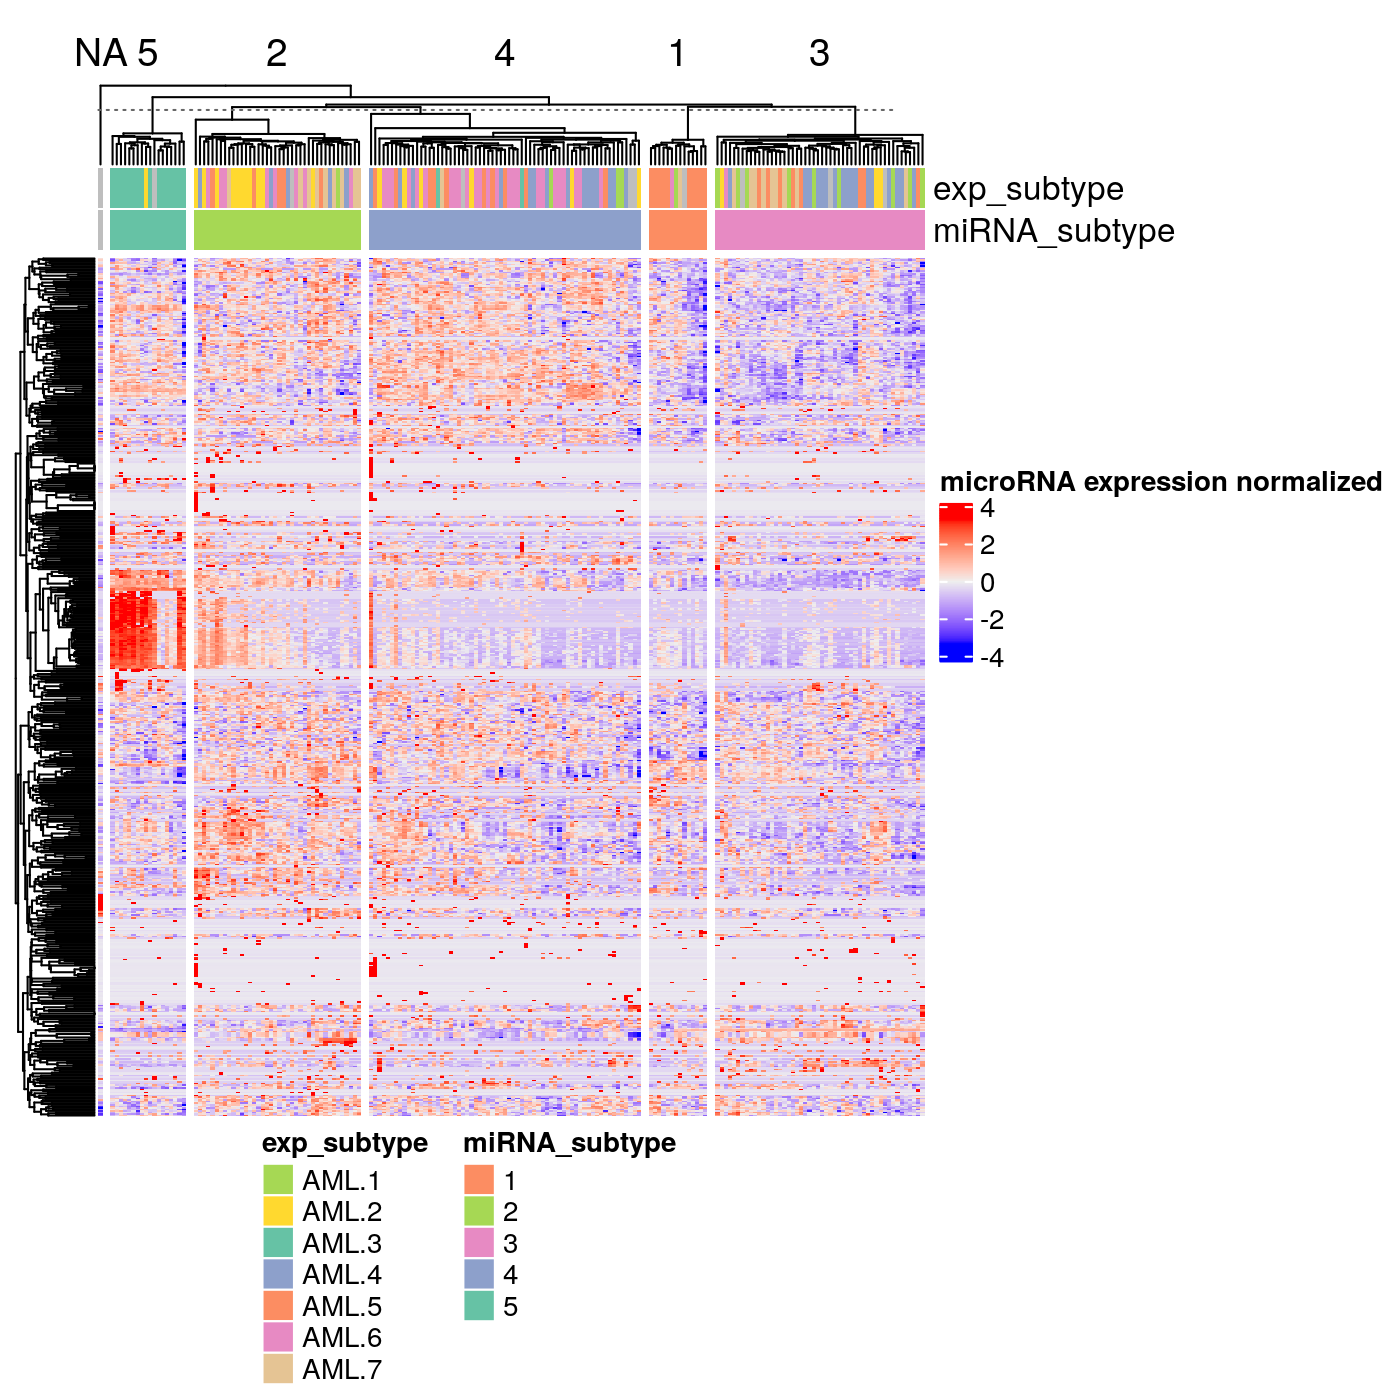

In [74]:
h <- Heatmap(as.matrix(data_mirna_norm), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(mirna_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(mirna_subtypes$Subtype_miRNA),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     miRNA_subtype=miRNA_subtypes_col)),
        column_split=as.factor(mirna_subtypes$Subtype_miRNA),
        name= "microRNA expression normalized")
draw(h, annotation_legend_side="bottom")

### III. DNA methylation

In [26]:
met_subtypes <- tibble(sample_codes=colnames(data_met)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_met'

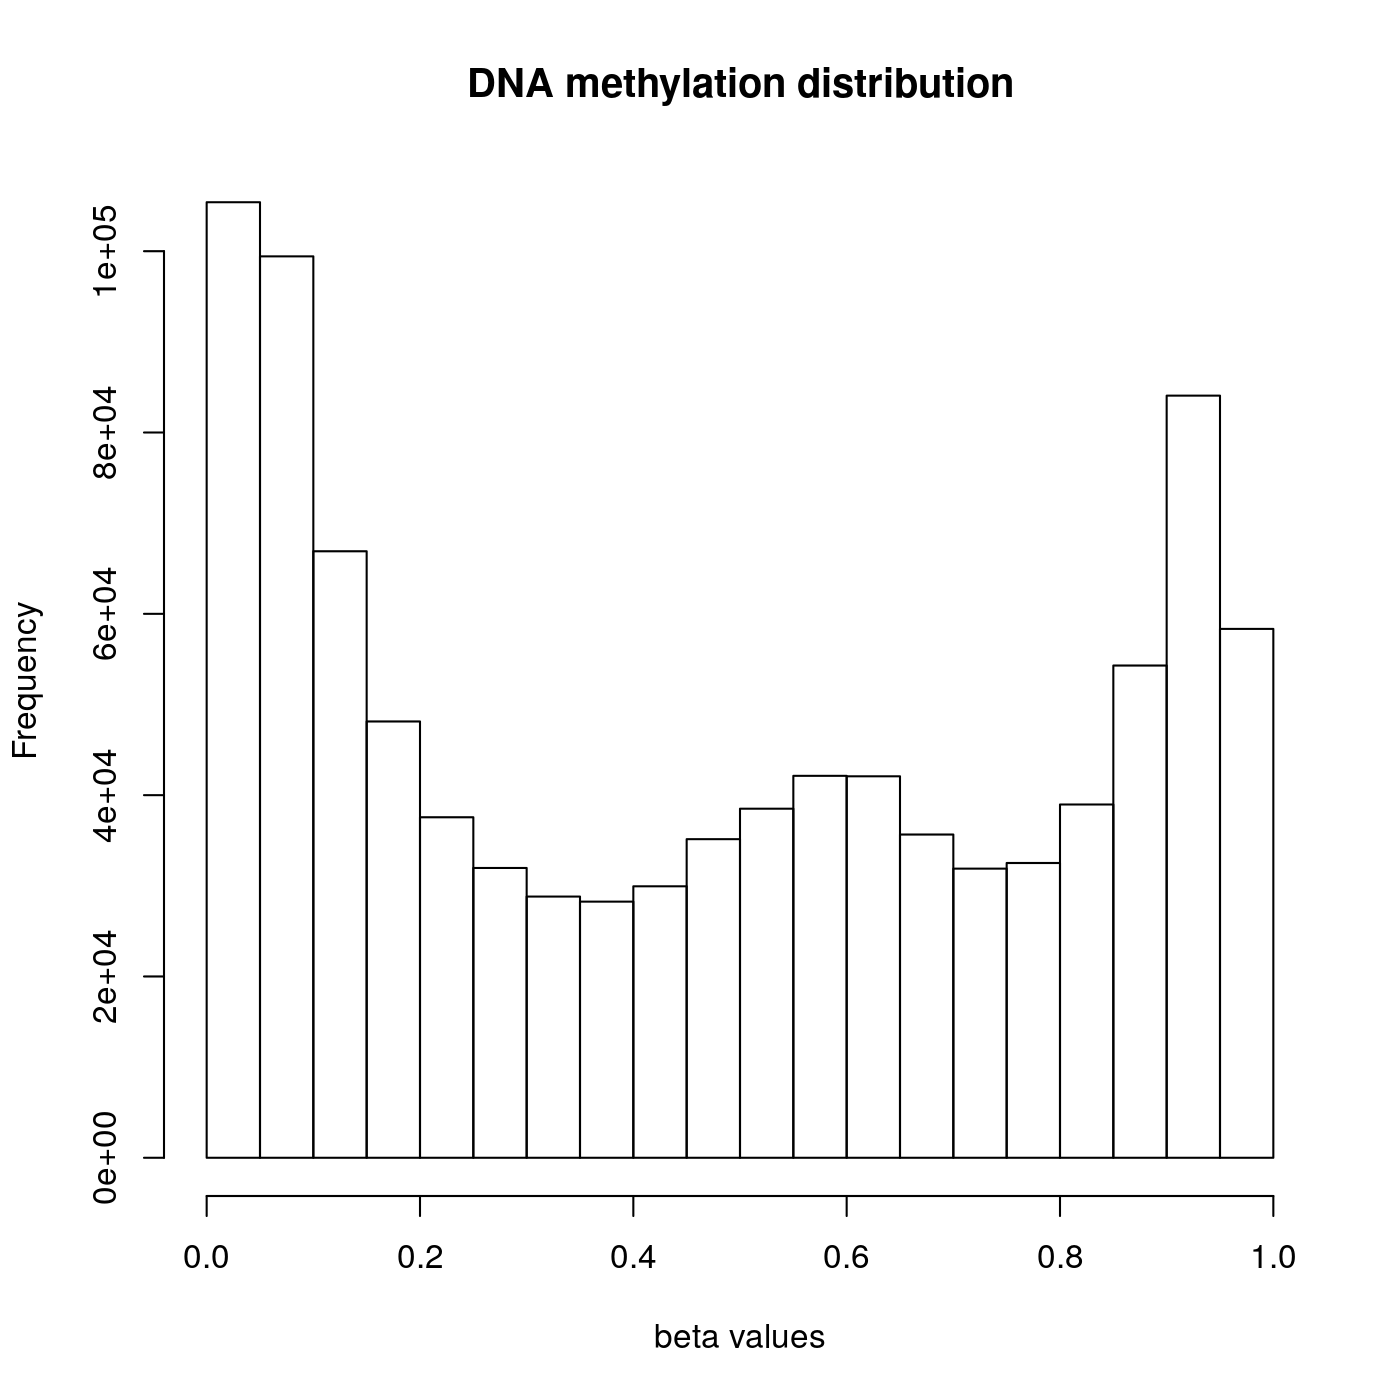

In [92]:
hist(as.vector(as.matrix(data_met)), main= "DNA methylation distribution", xlab="beta values")

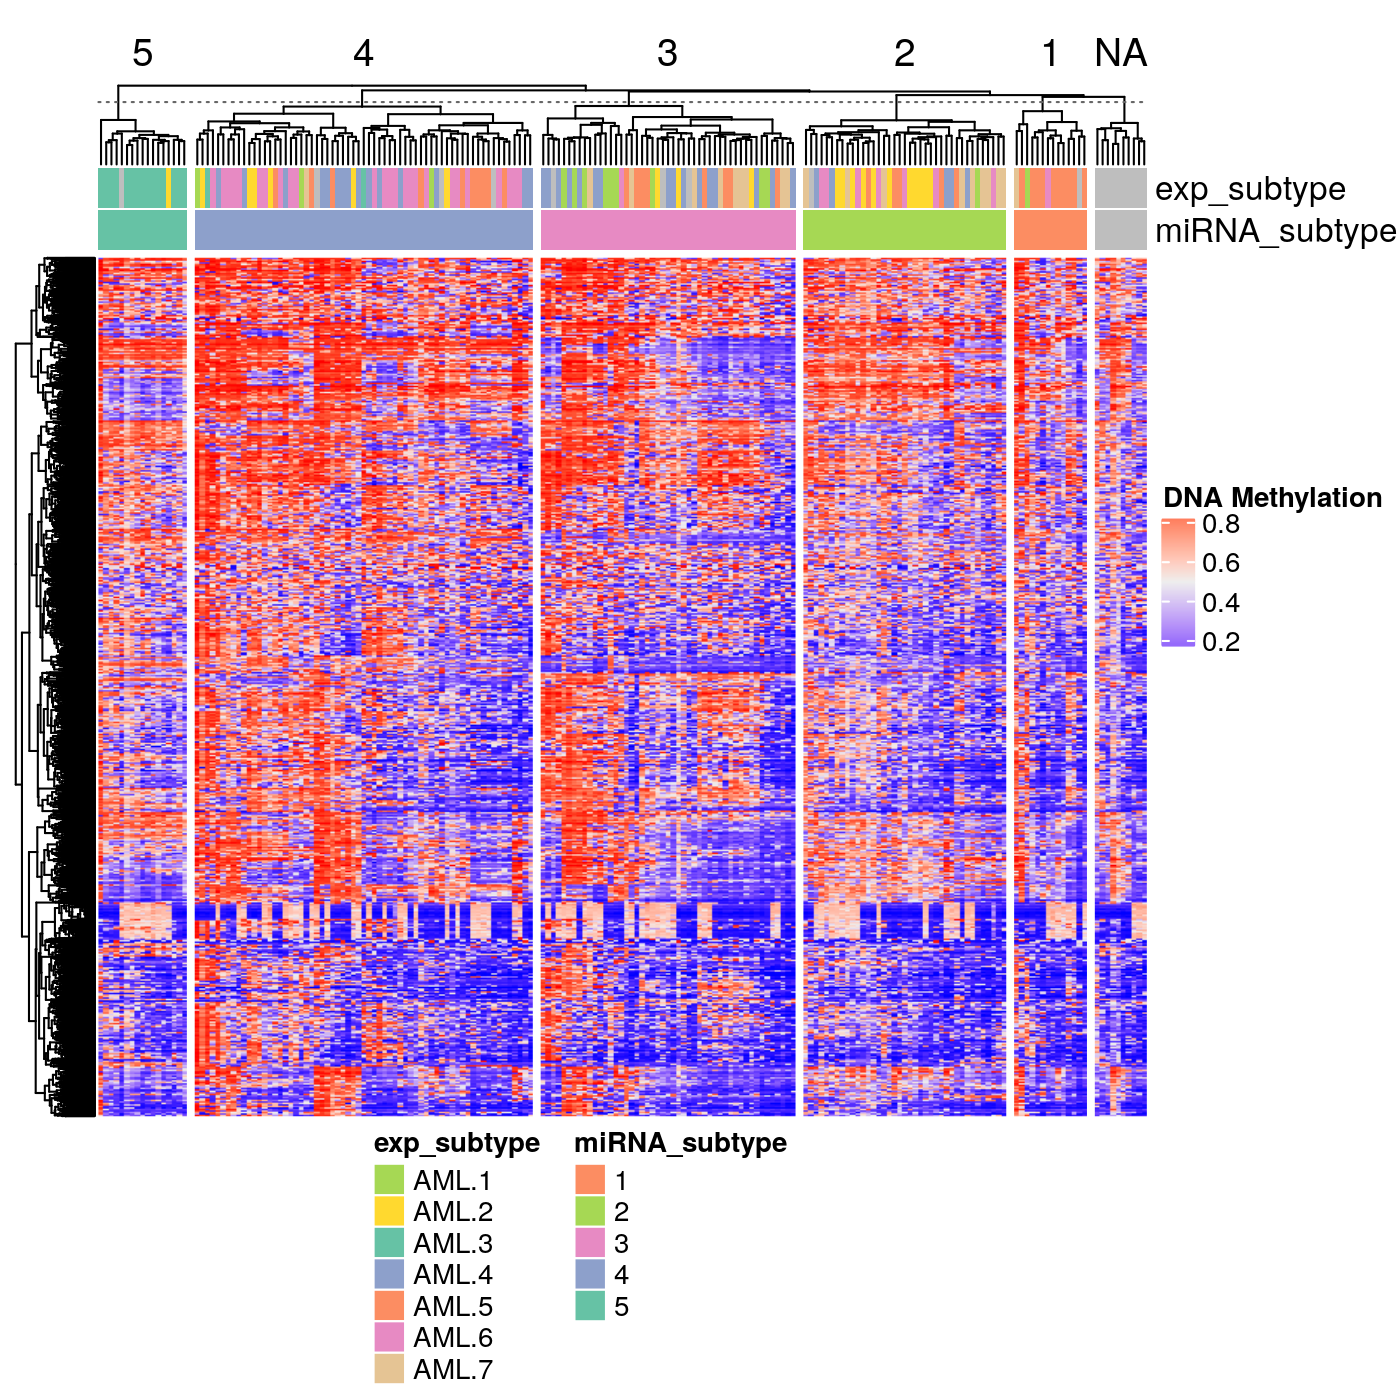

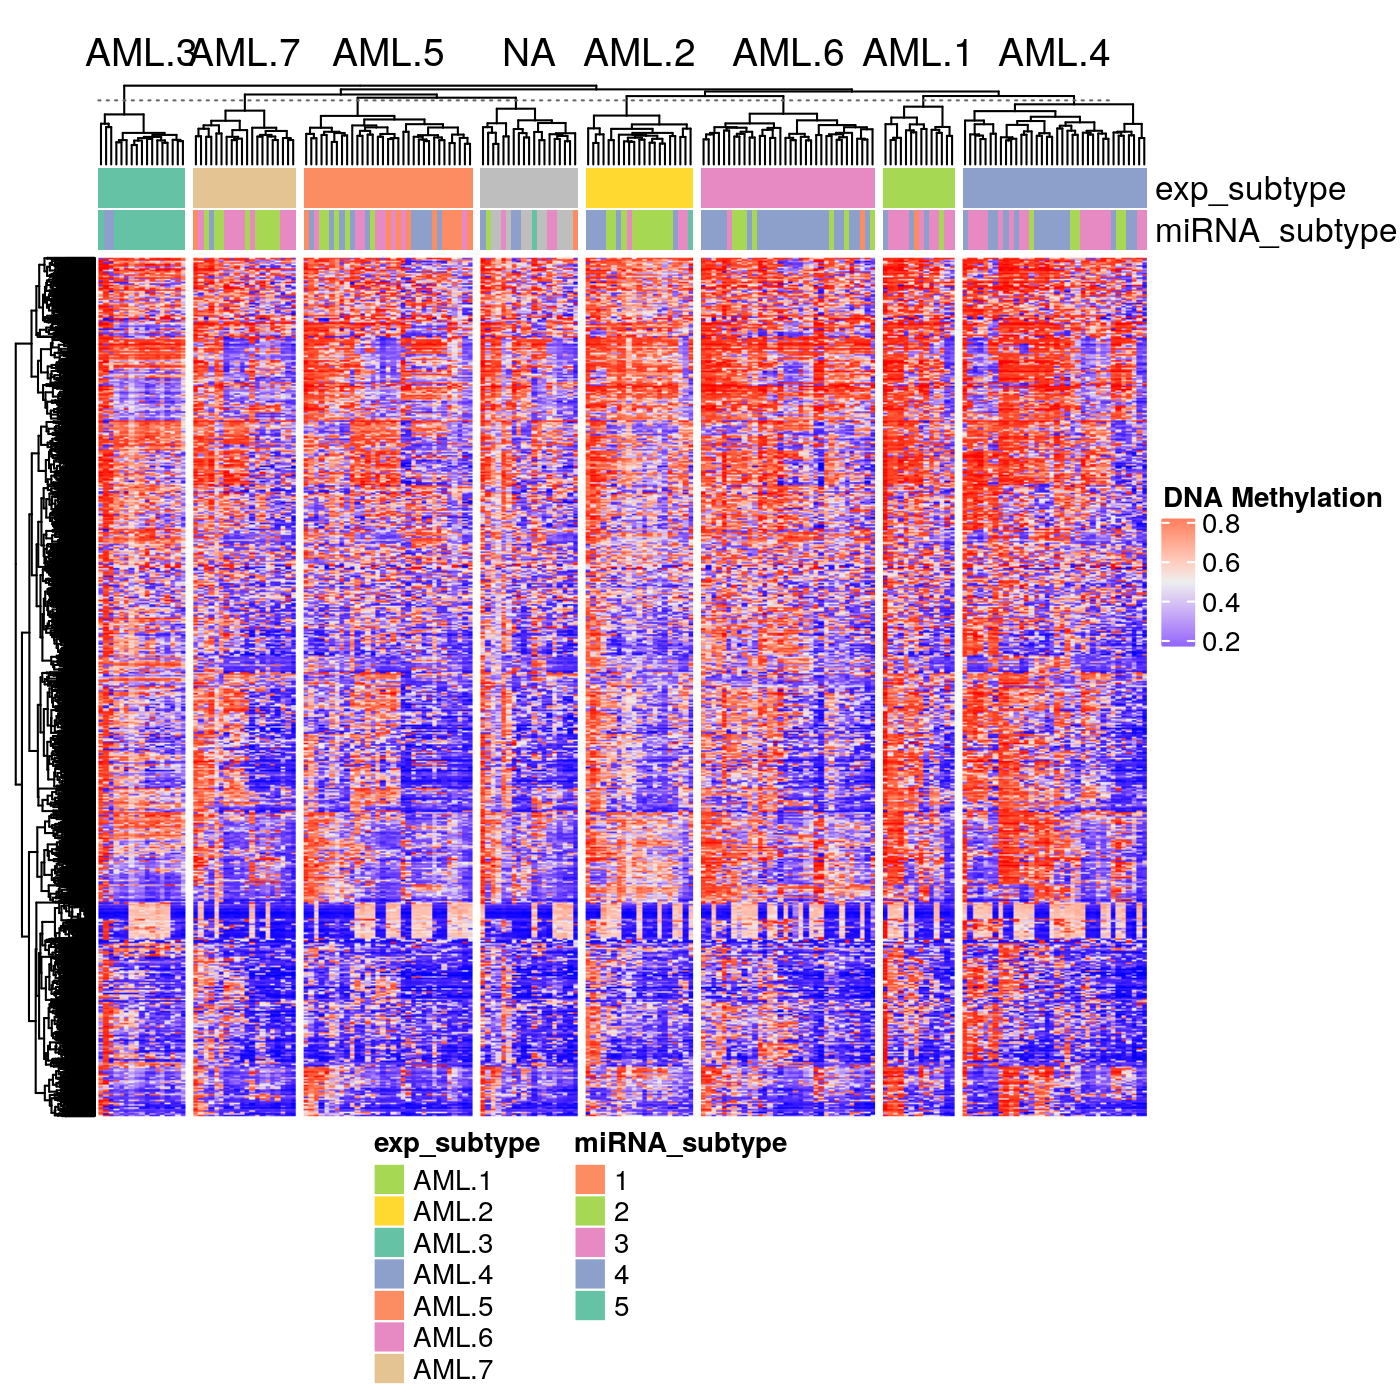

In [86]:
h1 <- Heatmap(as.matrix(data_met), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(met_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(met_subtypes$Subtype_miRNA),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     miRNA_subtype=miRNA_subtypes_col)),
        column_split=as.factor(met_subtypes$Subtype_miRNA),
        name= "DNA Methylation")
h2 <- Heatmap(as.matrix(data_met), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(met_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(met_subtypes$Subtype_miRNA),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     miRNA_subtype=miRNA_subtypes_col)),
        column_split=as.factor(met_subtypes$Subtype_Selected),
        name= "DNA Methylation")
draw(h1, annotation_legend_side="bottom")
draw(h2, annotation_legend_side="bottom")